In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.gridspec import GridSpec

## Sales Data

In [2]:
sales = pd.read_csv('../sample_data/sales_data.csv', parse_dates=['Date'], index_col=['Date'])

In [6]:
sales.head()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Date,,,,,,,,,,,,,,,,,
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
print(plt.style.available)
plt.style.use('seaborn')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Numerical Analysis and Visualization

#### Box Plot

In [19]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(15,5), title='Unit cost box plot');

<img src='./plots/sales-unit-cost-box-plot.png'>

#### Density Plot

In [22]:
sales['Unit_Cost'].plot(kind='density', figsize=(15,5), title='Unit cost KDE plot');

<img src='./plots/sales-unit-cost-kde-plot.png'>

In [30]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(15,5), title='Unit cost KDE plot | Red - Mean | Green - MEDIAN');
ax.axvline(sales['Unit_Cost'].mean(), color='r')
ax.axvline(sales['Unit_Cost'].median(), color='g')

<img src='./plots/sales-unit-cost-kde-plot-mean-median.png'>

#### Histogram

In [33]:
sales['Unit_Cost'].plot(kind='hist', figsize=(15,5), title='Unit cost Histogram plot', edgecolor='k');


<img src='./plots/sales-unit-cost-histogram-plot.png'>

## Categorical Analysis and Visualization

#### Bar plot

In [46]:
sales['Age_Group'].value_counts().plot(kind='barh', title='Age Group', fontsize=14);

<img src='./plots/sales-age-group-bar-plot.png'>

#### Pie plot

In [55]:
# plt.style.use('fivethirtyeight')
sales['Age_Group'].value_counts().plot(kind='pie', title='Age Group', subplots=True, autopct='%1.1f%%', figsize=(10,10) );

<img src='./plots/sales-age-group-pie-plot.png'>

## Relation between Columns [features]

In [56]:
sales.corr()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


#### Heatmap

In [64]:
sns.heatmap(sales.corr())

<img src='./plots/sales-corr-heatmap.png'>

#### Scatterplot

In [65]:
sns.scatterplot(data=sales, x='Revenue', y='Order_Quantity', hue='Customer_Age');

<img src='./plots/sales-order-quantity-revenue-scatterplot.png'>

In [68]:
sns.scatterplot(data=sales, x='Revenue', y='Profit', hue='Age_Group');

<img src='./plots/sales-profit-revenue-scatterplot.png'>

#### Box Plot

In [76]:
sales[['Age_Group','Profit']].boxplot(by=['Age_Group'], figsize=(15,10));

<img src='./plots/sales-age-group-profit-box-plot.png'>

In [88]:
cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']
sales[cols].plot(kind='box', subplots=True, figsize=(15,10), layout=(2,3));
plt.tight_layout()

<img src='./plots/sales--cost-box-plot.png'>

## Aggregation

In [24]:
sales.groupby(by='Month')['Revenue'].mean().plot(kind='barh', title='Sales Revenue by Month', figsize=(10,8), fontsize=16);

<img src='./plots/sales_revenue_by_month_bar_plot.png'>

In [25]:
sales.groupby(by='Month')['Revenue'].mean().plot(kind='pie', title='Sales Revenue by Month', figsize=(10,8), fontsize=16, subplots=True, autopct='%1.1f%%');

<img src='./plots/sales_revenue_by_month_pie_plot.png'>

In [26]:
sales.groupby(by='Year')['Revenue'].mean().plot(kind='barh', title='Sales Revenue by Year', figsize=(10,8), fontsize=16);

<img src='./plots/sales_revenue_by_year_bar_plot.png'>

In [27]:
sales.groupby(by='Year')[['Revenue','Profit']].mean().plot(kind='bar', title='Sales Revenue & Profit by Year', figsize=(10,8), fontsize=16);

<img src='./plots/sales_revenue_and_profit_by_year_bar_plot.png'>

In [28]:
sales.groupby(by='Year')[['Profit']].mean().plot(kind='pie', title='Sales Profit by Year', autopct='%1.1f%%', figsize=(10,10), fontsize=16, subplots=True);

<img src='./plots/sales_profit_by_year_pie_plot.png'>

## Column Wrangling

#### Revenue per Age

In [99]:
sales['RevenuePerAge'] = sales['Revenue'] /  sales['Customer_Age']
sales['RevenuePerAge'].plot( kind='hist');

<img src='./plots/sales_revenue_per_age.png'>

#### Add 3% tax to the unit price

In [36]:
ax1 = plt.subplot(121)
sales['Unit_Price'].apply(lambda x:x*1.03).plot(kind='hist', ax=ax1, figsize=(15,4), title='Unit price Histogram')

ax2 = plt.subplot(122)
sales['Unit_Price'].apply(lambda x:x*1.03).plot(kind='kde', ax=ax2, figsize=(15,4), title='Unit price DensityPlot');

<img src='./plots/sales-unit-price-hist-and-kde-plot.png'>

## Filtering

#### Get all the sales from Kentucky

In [95]:
sales.loc[sales['State']=='Kentucky'].sort_index().head()[['State','Cost','Profit','Revenue']]

,State,Cost,Profit,Revenue
Date,,,,
2013-11-04,Kentucky,45,63,108
2014-04-16,Kentucky,96,142,238
2014-04-16,Kentucky,377,537,914
2014-04-16,Kentucky,22,32,54
2014-04-16,Kentucky,231,336,567


In [98]:
sales.loc[sales['State']=='Kentucky'].sort_index()[['Profit','Revenue']].plot(kind='barh', title='Kentucky Profit & Revenue', figsize=(10,8))

<img src='./plots/Kentucky-Profit-Revenue-bar-plot.png'>

#### Get Mean Revenue of the Adults (35-64) Age group

In [101]:
sales.query('Age_Group == "Adults (35-64)"')['Revenue'].mean()

762.8287654055604

####  Sales data | Adults (35-64) Age group

In [103]:
sales.groupby(by='Age_Group')[['Cost','Revenue','Profit']].agg(['mean','std'])

Cost                 Revenue               \
                            mean         std        mean          std   
Age_Group                                                               
Adults (35-64)        470.453049  888.646006  762.828765  1316.725395   
Seniors (64+)         232.708219  568.368564  421.975342   885.218576   
Young Adults (25-34)  498.495705  893.969882  793.077405  1323.501204   
Youth (<25)           412.194694  859.312747  657.572302  1260.836518   

                          Profit              
                            mean         std  
Age_Group                                     
Adults (35-64)        292.375717  459.192217  
Seniors (64+)         189.267123  343.051466  
Young Adults (25-34)  294.581699  458.898770  
Youth (<25)           245.377608  426.919648

In [113]:
(sales.groupby(by='Age_Group')[['Revenue']]
 .agg(['mean','std'])
 .plot(kind='barh', figsize=(10,8), fontsize=16, title='Mean and Std of Revenue by AgeGroup'));

<img src='./plots/mean-and-std-of-revenue-by-age-group.png'>

In [119]:
(sales.groupby(by='Age_Group')[['Revenue']].mean()
 .plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(8,8), title='Revenue by Age Group'));

<img src='./plots/revenue-by-age-group.png'>

In [143]:
grid = GridSpec(nrows=3, ncols=2, figure=plt.figure(figsize=(20,10)))

ax1 = plt.subplot(grid[:,0])
ax2 = plt.subplot(grid[0,1])
ax3 = plt.subplot(grid[1,1])
ax4 = plt.subplot(grid[2,1])

(sales.groupby(by='Age_Group')[['Cost', 'Revenue', 'Profit']].mean()
 .plot(kind='barh',  ax=ax1));


(sales.groupby(by='Age_Group')[['Revenue']].mean()
 .plot(kind='pie', subplots=True, autopct='%1.1f%%',  ax=ax3, legend=False));

(sales.groupby(by='Age_Group')[['Cost']].mean()
 .plot(kind='pie', subplots=True, autopct='%1.1f%%',  ax=ax2, legend=False));

(sales.groupby(by='Age_Group')[['Profit']].mean()
 .plot(kind='pie', subplots=True, autopct='%1.1f%%',  ax=ax4, legend=False));

<img src='./plots/cost-revenue-profit-by-age-group-grid-plot.png'>

#### Sales data | Age Group = Adults (35-64) in United States

In [155]:

grid = GridSpec(nrows=3, ncols=2, figure=plt.figure(figsize=(20,10)))

ax1 = plt.subplot(grid[:,0])
ax2 = plt.subplot(grid[0,1])
ax3 = plt.subplot(grid[1,1])
ax4 = plt.subplot(grid[2,1])

(sales.query('Country=="United States"').groupby(by='Age_Group')[['Cost', 'Revenue', 'Profit']].mean()
 .plot(kind='barh',  ax=ax1));


(sales.query('Country=="United States"').groupby(by='Age_Group')[['Revenue']].mean()
 .plot(kind='pie', subplots=True, autopct='%1.1f%%',  ax=ax3, legend=False));

(sales.query('Country=="United States"').groupby(by='Age_Group')[['Cost']].mean()
 .plot(kind='pie', subplots=True, autopct='%1.1f%%',  ax=ax2, legend=False));

(sales.query('Country=="United States"').groupby(by='Age_Group')[['Profit']].mean()
 .plot(kind='pie', subplots=True, autopct='%1.1f%%',  ax=ax4, legend=False));

fig = plt.gcf()
fig.suptitle(t='Sales data | Age Group = Adults (35-64) in United States ', fontsize=24)

<img src='./plots/usa-cost-revenue-profit-by-age-group-grid-plot.png'>

#### Mean cost over the years

In [215]:
sales.groupby('Year')[['Cost']].mean().plot(figsize=(10,5), marker='.', title='Cost over the years');

<img src='./plots/mean-cost-over-the-years.png'>

In [216]:
sample = (sales.groupby('Year')[['Cost']].mean()).copy()

sample.plot(figsize=(15,8), alpha=0.5, title='Cost Over the Years')
for year in sample.index:
    plt.scatter(year, sample.loc[year].values[0], marker='8', s=700)
    plt.scatter(year, sample.loc[year].values[0], color='k', marker=f'${sample.loc[year].values[0]:0.2f}$', s=900)

<img src='./plots/mean-cost-over-the-years-with-text.png'>

In [232]:
sample = (sales.groupby('Year')[['Revenue','Cost','Profit']].mean()).copy()

sample.plot(figsize=(15,8), alpha=0.5, title='Revenue,Cost & Profit Over the Years')

for year in sample.index:
    plt.scatter(year, sample.loc[year]['Revenue'], marker='8', s=700)
    plt.scatter(year, sample.loc[year]['Revenue'], color='k', marker=f'${sample.loc[year]["Revenue"]:0.2f}$', s=900)
    plt.scatter(year, sample.loc[year]['Cost'], marker='8', s=700)
    plt.scatter(year, sample.loc[year]['Cost'], color='k', marker=f'${sample.loc[year]["Cost"]:0.2f}$', s=900)
    plt.scatter(year, sample.loc[year]['Profit'], marker='8', s=700)
    plt.scatter(year, sample.loc[year]['Profit'], color='k', marker=f'${sample.loc[year]["Profit"]:0.2f}$', s=900)

<img src='./plots/reveneue-cost-and-profit-over-the-years.png'>

<AxesSubplot:title={'center':'Revenue,Cost & Profit Over the Years'}, xlabel='Year'>

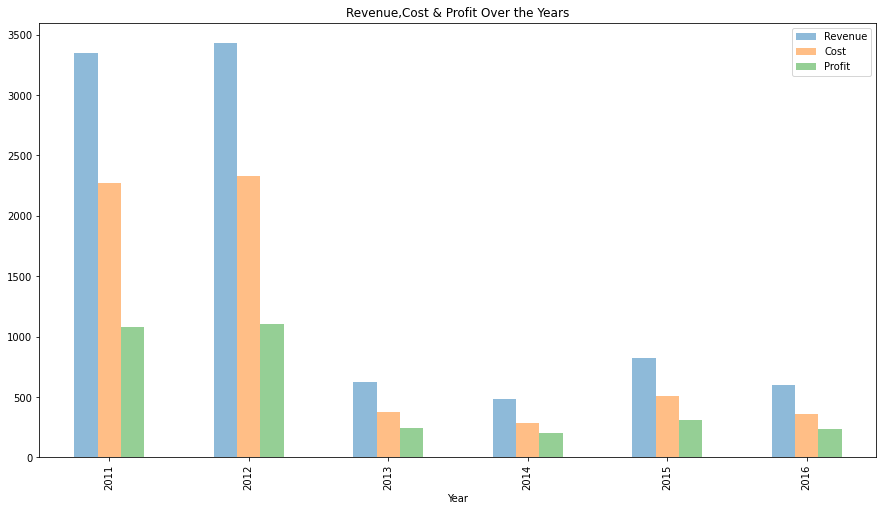

In [234]:
sample.plot(figsize=(15,8), alpha=0.5, title='Revenue,Cost & Profit Over the Years', kind='bar')

In [282]:
# sample = (sales.groupby('Year')[['Revenue','Cost','Profit']].mean()).copy()


grid = GridSpec(nrows=4, ncols=2, figure=plt.figure(figsize=(25,15)))

ax1 = plt.subplot(grid[:2,0])
ax2 = plt.subplot(grid[0,1])
ax3 = plt.subplot(grid[1,1])
ax4 = plt.subplot(grid[2,1])
ax5 = plt.subplot(grid[3,1])
ax6 = plt.subplot(grid[2:,0])


sample.plot(figsize=(15,8), alpha=0.5, title='Revenue,Cost & Profit Over the Years', kind='bar', ax=ax1)


sample.plot(figsize=(15,8), alpha=0.5, title='Revenue,Cost & Profit Over the Years', ax=ax6)

for year in sample.index:
    ax6.scatter(year, sample.loc[year]['Revenue'], marker='8', s=700)
    ax6.scatter(year, sample.loc[year]['Revenue'], color='k', marker=f'${sample.loc[year]["Revenue"]:0.2f}$', s=900)
    ax6.scatter(year, sample.loc[year]['Cost'], marker='8', s=700)
    ax6.scatter(year, sample.loc[year]['Cost'], color='k', marker=f'${sample.loc[year]["Cost"]:0.2f}$', s=900)
    ax6.scatter(year, sample.loc[year]['Profit'], marker='8', s=700)
    ax6.scatter(year, sample.loc[year]['Profit'], color='k', marker=f'${sample.loc[year]["Profit"]:0.2f}$', s=900)



sample['Revenue'].plot(ax=ax2, title='Revenue', xlabel='', alpha=0.4, figsize=(15,12))
for year in sample.index:
    ax2.scatter(year, sample.loc[year]['Revenue'], marker='8', s=700)
    ax2.scatter(year, sample.loc[year]['Revenue'], color='k', marker=f'${sample.loc[year]["Revenue"]:0.2f}$', s=900)



sample['Cost'].plot(ax=ax3, title='Cost', xlabel='', alpha=0.4, figsize=(15,12))
for year in sample.index:
    ax3.scatter(year, sample.loc[year]['Cost'], marker='8', s=700)
    ax3.scatter(year, sample.loc[year]['Cost'], color='k', marker=f'${sample.loc[year]["Cost"]:0.2f}$', s=900)



sample['Profit'].plot(ax=ax4, title='Profit', xlabel='', alpha=0.4, figsize=(15,12))
for year in sample.index:
    ax4.scatter(year, sample.loc[year]['Profit'], marker='8', s=700)
    ax4.scatter(year, sample.loc[year]['Profit'], color='k', marker=f'${sample.loc[year]["Profit"]:0.2f}$', s=900)


sample.plot(figsize=(15,12), alpha=0.5, title='Revenue,Cost & Profit Over the Years', kind='area', ax=ax5, stacked=False)

plt.tight_layout()

<img src='./plots/cost-revenue-profit-by-age-group-advanced-grid-plot.png'>

In [283]:
sample.plot(figsize=(15,8), alpha=0.5, title='Revenue,Cost & Profit Over the Years', kind='area', stacked=False);

<img src='./plots/cost-revenue-profit-by-age-group-area-plot.png'>